In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from f_statistics import correlation_by_decile, plot_transaction_frequency_from_dataframe, plot_transaction_frequency_and_avg_value
from datetime import datetime

In [2]:
with open('Transactions_with_traits/df_bakc_traits.json') as a, \
        open('Transactions_with_traits/df_bayc_traits.json') as b: \
        #open('Transactions_with_traits/df_mayc_traits.json') as c:
    df_bakc_t = pd.read_json(a)
    df_bayc_t = pd.read_json(b)

In [3]:
df_bakc_rev = df_bakc_t[::-1]
df_bayc_rev = df_bayc_t[::-1]

In [4]:
print(df_bakc_rev["payment.quantity"].mean(), df_bakc_rev["payment.quantity"].min(), df_bakc_rev["payment.quantity"].max())
print(df_bayc_t['payment.quantity'].mean(), df_bayc_t["payment.quantity"].min() ,df_bayc_t['payment.quantity'].max())

5.875639964778469e+18 0.0 4.2e+21
4.078384526157912e+19 0.0 8e+22


In [4]:
df_bakc_rev.head(100)

,event_type,order_hash,chain,protocol_address,closing_date,quantity,seller,buyer,transaction,event_timestamp,...,nft.is_disabled,nft.is_nsfw,payment.quantity,payment.token_address,payment.decimals,payment.symbol,payment,nft,nft.traits,rarity_score
54457,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624055595,1,0xbce3bd3b206946abbe094903ae2b4244b52fb4e9,0x02f5d9c2b5376f8b9150cf148aa88a5fdd5dcc50,0x60498f139b32a122363ee8c757a359173ff63090ad57...,1624055595,...,0.0,0.0,5.000000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'SS Mon...",161.074427
54456,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624055645,1,0x268d3a8c4701000546dd0bf959bf6c8956cc3e5e,0xed034b287ea77a14970f1c0c8682a80a9468dbb3,0xe96e2a6939e52ea54f27fd32f52fe2dff62fed2d39b0...,1624055645,...,0.0,0.0,4.200000e+17,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18.0,WETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Swamp'...",158.783203
54455,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624055920,1,0x80a40db7895dce583344b87453ece862e4affa1b,0x729dcbdfebcc0741b845256e764ece7f4db55ccc,0x8f5c49c85cd15de606d6bf9c6f24b92060208e7677cb...,1624055920,...,0.0,0.0,5.000000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Swamp'...",103.735357
54454,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624056276,1,0x51a528da1083ba23943ba2092ee2a278c8715779,0x1ded182dfb58f3253787fb880b55023d8f6f5305,0x72194ca01b43bf09492c2f020c6c247cbc221e945eba...,1624056276,...,0.0,0.0,7.500000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Swamp'...",205.597444
54453,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624056410,1,0x6fcade9de3ab9a1e57eab1684cf30e2ceba234fb,0xa442ddf27063320789b59a8fdca5b849cd2cdeac,0x0055de5314d2fed48e6312b5f44b4116691b96574164...,1624056410,...,0.0,0.0,8.000000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Club E...",212.369194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54362,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624062488,1,0xfc7b2cbf780ca8bff61002a0018c3aa919426c0f,0x65217c49f9f1c4b5d468bcbf2942310cff530df1,0x99076b18be909edfc0acb0361ace1ec3c6323ebf8b42...,1624062488,...,0.0,0.0,7.000000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Swamp'...",343.655669
54361,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624062848,1,0x8eb5fb99ffdfe1c5ca40f6b814997ff3dd18d006,0x24aa0b0cb84140ee3768d155dfdc057946b6c8e6,0x7f008d9af4021407cdae193763771ab57466a79b766f...,1624062848,...,0.0,0.0,6.980000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'SS Mon...",147.944415
54360,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624062927,1,0x3a788637e263f4c41e5be4bc056c9328d5b64e6b,0xd941e78637427cbf13527abcbb846e6a81cc59fd,0x54c85a7fd4031efa7731cedf01bd578ad5a40abc48da...,1624062927,...,0.0,0.0,6.950000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Outhou...",167.797881
54359,sale,,ethereum,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1624062978,1,0x7f24f65868977ad7ef02a88f867fb43c7c4b77ef,0xd1acbe05a739c855f2c54f42f0f1e3df662da56d,0xf7c6b7a1ef796151d51b0f717298be9fa90781193be5...,1624062978,...,0.0,0.0,6.940000e+17,0x0000000000000000000000000000000000000000,18.0,ETH,NaN,NaN,"[{'trait_type': 'Background', 'value': 'Club E...",219.288866


In [5]:
df_bakc_rev.loc[:,["nft.identifier", 'nft.metadata_url', "rarity_score", "payment.quantity"]]

,nft.identifier,nft.metadata_url,rarity_score,payment.quantity
54457,6843.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,161.074427,5.000000e+17
54456,8937.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,158.783203,4.200000e+17
54455,7757.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,103.735357,5.000000e+17
54454,7139.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,205.597444,7.500000e+17
54453,7674.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,212.369194,8.000000e+17
...,...,...,...,...
4,6623.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,223.270514,1.630000e+18
3,2031.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,225.351722,1.630000e+18
2,9056.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,189.029610,1.787800e+18
1,3575.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,63.915162,1.630000e+18


In [6]:
count_zeros = (df_bakc_rev["payment.quantity"]==0.0).sum()
print(count_zeros)
print(len(df_bakc_rev))

11
54458


In [7]:
conditions = ~((df_bakc_rev[['nft.identifier', 'nft.metadata_url', 'rarity_score', 'payment.quantity']].isna().any(axis=1)) | (df_bakc_rev[['nft.identifier', 'nft.metadata_url', 'rarity_score', 'payment.quantity']].eq(0.0).any(axis=1)))
# Filtered DataFrame
df_filtered = df_bakc_rev[conditions]

In [8]:
df_filtered.loc[:,["nft.identifier", 'nft.metadata_url', "rarity_score", "payment.quantity"]]

,nft.identifier,nft.metadata_url,rarity_score,payment.quantity
54457,6843.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,161.074427,5.000000e+17
54456,8937.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,158.783203,4.200000e+17
54455,7757.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,103.735357,5.000000e+17
54454,7139.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,205.597444,7.500000e+17
54453,7674.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,212.369194,8.000000e+17
...,...,...,...,...
4,6623.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,223.270514,1.630000e+18
3,2031.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,225.351722,1.630000e+18
2,9056.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,189.029610,1.787800e+18
1,3575.0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,63.915162,1.630000e+18


In [29]:
df_filtered.groupby(['nft.metadata_url'])['payment.quantity'].mean()

nft.metadata_url
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/10      3.500000e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/100     7.823333e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/1002    5.519750e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/1003    2.864667e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/1004    4.875000e+18
                                                                                ...     
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/9994    4.565750e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/9995    9.385300e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/9996    5.500000e+18
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/9997    1.923750e+19
https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65AW6Wska295Dg9nbEYpSUDR/9998    2.893789e+18
Name

In [9]:
first_transactions = df_filtered.groupby('nft.metadata_url').first()
last_transactions = df_filtered.groupby('nft.metadata_url').last()
rarity_transactions = df_filtered.groupby('nft.metadata_url').first()

# Calculate the return for each NFT
first_prices = first_transactions['payment.quantity']
last_prices = last_transactions['payment.quantity']
rarity = rarity_transactions['rarity_score']
returns = ((last_prices - first_prices) / first_prices) * 100
returns_df = pd.DataFrame({'nft.metadata_url': returns.index, 'percentage_return': returns.values, 'rarity_score': rarity.values})

In [10]:
returns_df.head(100)

,nft.metadata_url,percentage_return,rarity_score
0,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,0.000000,227.052217
1,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,-36.093609,364.252353
2,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,566.666667,278.177910
3,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,991.549296,196.457768
4,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,43.750000,136.351727
...,...,...,...
95,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,0.000000,184.639352
96,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,19.851920,137.196333
97,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,0.000000,237.566356
98,https://ipfs.io/ipfs/QmTDcCdt3yb6mZitzWBmQr65A...,0.000000,293.392780


In [36]:
print(returns_df["percentage_return"].min(), returns_df["percentage_return"].mean(),  returns_df["percentage_return"].max())

-100.0 84817568.53084004 603124999900.0


In [37]:
correlation_ret_rar = returns_df['rarity_score'].corr(returns_df['percentage_return'])
print(correlation_ret_rar)

0.0015082555739737778


In [38]:
returns_df['rarity_decile'] = pd.qcut(returns_df['rarity_score'], 10, labels=range(1, 11))

In [40]:
# Calculate correlations for each decile
correlations_by_decile = {}
for decile in range(1, 11):
    decile_data = returns_df[returns_df['rarity_decile'] == decile]
    correlation = decile_data['percentage_return'].corr(decile_data['rarity_score'])
    correlations_by_decile[decile] = correlation

In [41]:
# Print correlations for each decile
for decile, correlation in correlations_by_decile.items():
    print(f"Decile {decile}: Correlation = {correlation}")

Decile 1: Correlation = 0.050290913410288685
Decile 2: Correlation = 0.0266279034021802
Decile 3: Correlation = -0.012208254321912543
Decile 4: Correlation = -0.022855173628496258
Decile 5: Correlation = -0.02524359786578944
Decile 6: Correlation = 0.06213131504254092
Decile 7: Correlation = 0.0010879522702402279
Decile 8: Correlation = -0.0354114783484676
Decile 9: Correlation = -0.052703782501870654
Decile 10: Correlation = 0.12632394273000686


In [43]:
# Calculate correlations for each decile
returns_by_decile = {}
for decile in range(1, 11):
    decile_data = returns_df[returns_df['rarity_decile'] == decile]
    mean = decile_data['percentage_return'].mean()
    returns_by_decile[decile] = mean

In [44]:
for decile, mean in returns_by_decile.items():
    print(f"Decile {decile}: Mean returns = {mean}")

Decile 1: Mean returns = 291.06818756787413
Decile 2: Mean returns = 265.4345458338856
Decile 3: Mean returns = 470.25969501387647
Decile 4: Mean returns = 14629.857337079806
Decile 5: Mean returns = 233.32674910881627
Decile 6: Mean returns = 848278020.8062826
Decile 7: Mean returns = 492.56106875428907
Decile 8: Mean returns = 248.3375081351904
Decile 9: Mean returns = 163.2984242474386
Decile 10: Mean returns = 163.29455543031006


In [18]:
#grouped = df_bakc_rev.groupby('nft.metadata_url')  # print(grouped.ngroups) number of unique groups

## Calculating and plotting frequencies

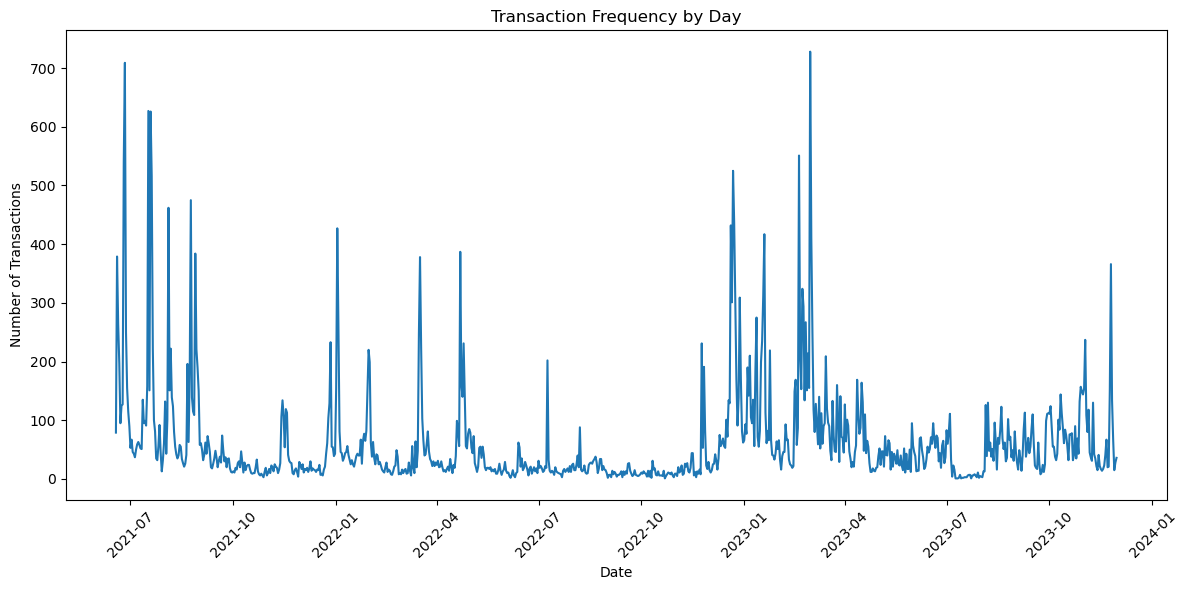

In [55]:
# Assuming your DataFrame is loaded as 'transactions_df' and the timestamp column is 'timestamp'
plot_transaction_frequency_from_dataframe(df_bakc_rev, 'event_timestamp', 'Transaction Frequency by Day')

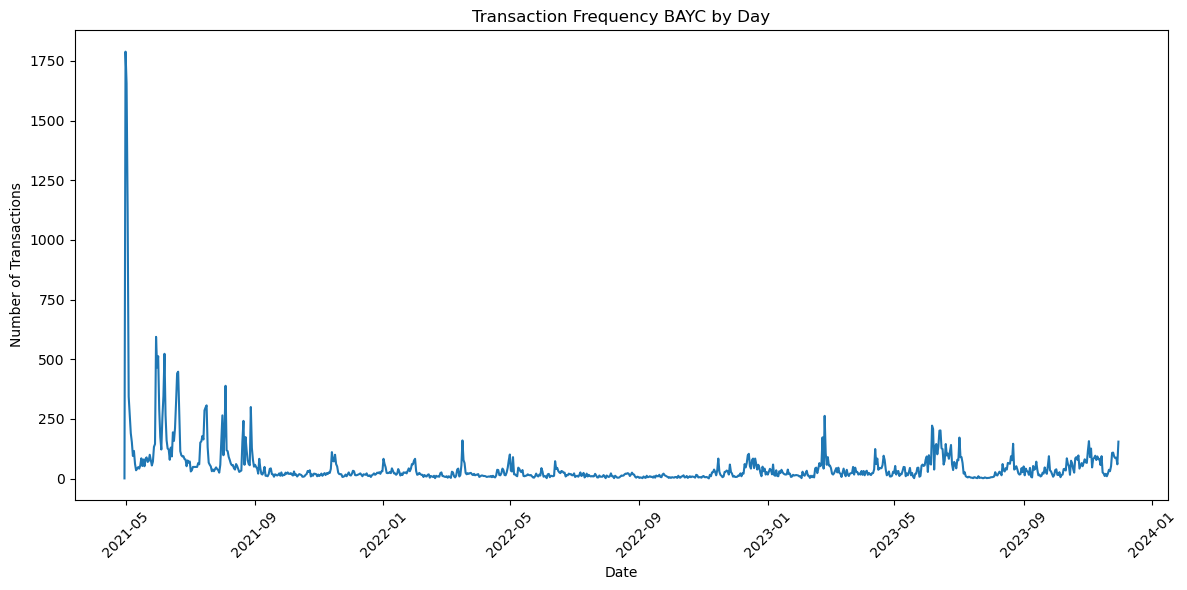

In [56]:
# Assuming your DataFrame is loaded as 'transactions_df' and the timestamp column is 'timestamp'
plot_transaction_frequency_from_dataframe(df_bayc_rev, 'event_timestamp', 'Transaction Frequency BAYC by Day')

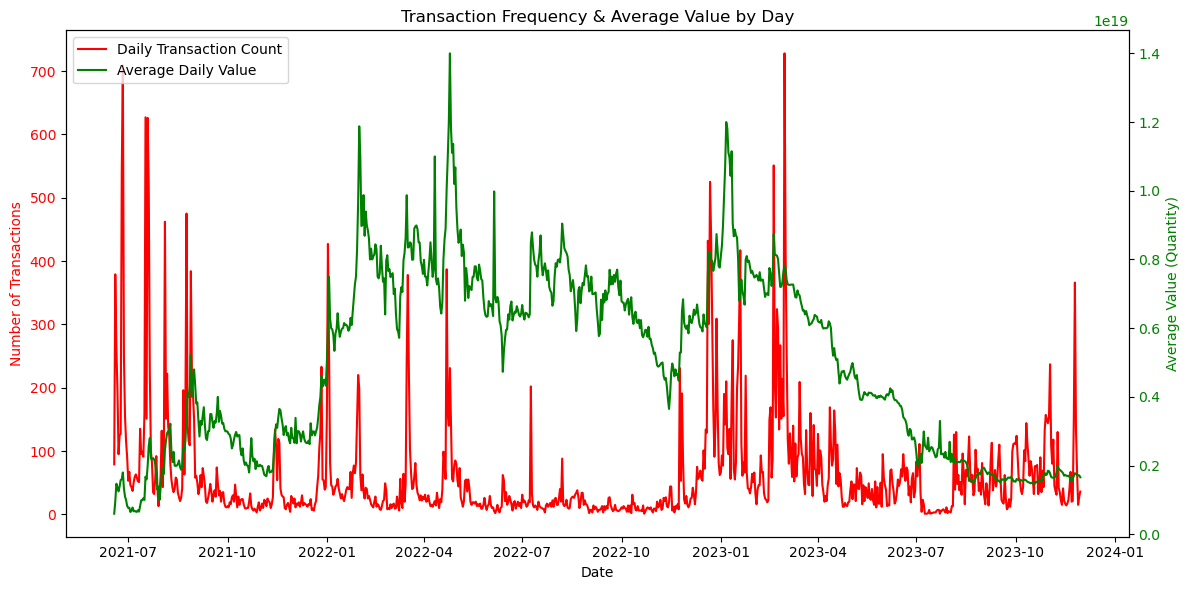

In [50]:
# Assuming your DataFrame is loaded as 'transactions_df' and the timestamp, value columns are 'timestamp', 'payment.quantity' respectively
plot_transaction_frequency_and_avg_value(df_bakc_rev, 'event_timestamp', 'payment.quantity', 'Transaction Frequency & Average Value by Day')

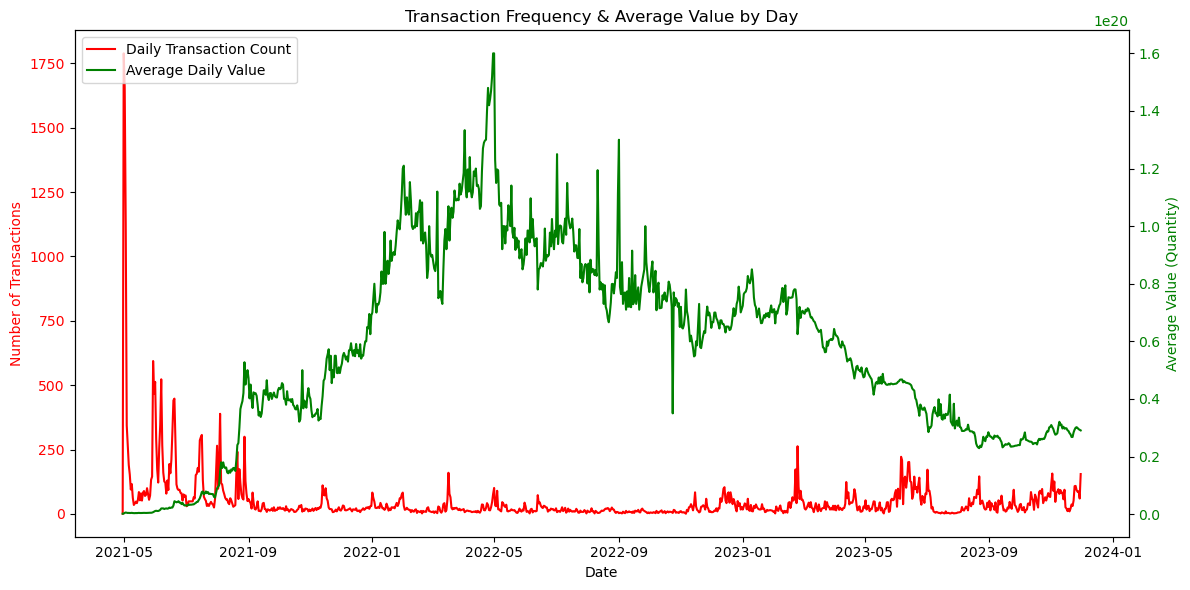

In [51]:
# Assuming your DataFrame is loaded as 'transactions_df' and the timestamp, value columns are 'timestamp', 'payment.quantity' respectively
plot_transaction_frequency_and_avg_value(df_bayc_rev, 'event_timestamp', 'payment.quantity', 'Transaction Frequency & Average Value by Day')